## CSV recap

### Review 1: Read in the file 'cs220_survey_data.csv' into a lists of lists

In [1]:
import csv

# source:  Automate the Boring Stuff with Python Ch 12
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

survey_data = process_csv("cs220_survey_data.csv")  

### Review 2: How many rows are there in 'cs220_survey_data.csv' dataset?

In [2]:
print(len(survey_data))

897


### Review 3: display to output just the first 5 rows of this list of lists

In [3]:
survey_data[:5]

[['lecture', 'age', 'major', 'topping'],
 ['LEC001', '19', 'Computer Science', 'basil/spinach'],
 ['LEC002', '18', 'Engineering', 'pineapple'],
 ['LEC003', '19', 'Business', 'pepperoni'],
 ['LEC003', '19', 'Engineering', 'Other']]

### Review 4: store the first row in a variable called header

In [4]:
header = survey_data[0]
header

['lecture', 'age', 'major', 'topping']

### Review 5: store the rest of the data in a variable called rows

In [5]:
rows = survey_data[1:]

### Review 6: display to output the last 10 rows

In [6]:
rows[-10:]

[['LEC005', '22', 'Data Science', 'pineapple'],
 ['LEC001', '20', 'Data Science', 'Other'],
 ['LEC002', '20', 'Engineering', 'sausage'],
 ['LEC002', '20', 'Data Science', 'pepperoni'],
 ['LEC002', '19', 'Data Science', 'mushroom'],
 ['LEC001', '19', 'Data Science', 'pepperoni'],
 ['LEC001', '20', 'Data Science', 'pepperoni'],
 ['LEC004', '21', 'Computer Science', 'pepperoni'],
 ['LEC001', '19', 'Engineering', 'tomato'],
 ['LEC004', '18', 'Engineering', 'pepperoni']]

### Review 7: Write a for loop that counts how many students selected "mushroom"

In [7]:
count = 0 

for row in rows:
    toppings = row[3]
    if "mushroom" in toppings.lower():
        count += 1

count

78

### Think about it: Is there an easy way to count *every* topping frequency? 

## October 18: Dictionaries

Learning Objectives:
- Understand the advantages dictionaries have over lists.
- Use correct dictionary syntax 
 - to create a dictionary using either {} or dict()
 - to lookup, insert, update, and pop key/value pairs
-Use a for loop, the in operator, and common methods when working with dictionaries.
-Write code that uses a dictionary
 - to store frequencies
 - to store and process information that is updated

As we are getting more sofisticated in this course, its time to define...
### Data Structure <br>
a data structure is a collection of data values, the relationships among them, and the functions or operations that can be applied to the data  (Wikipedia)

Python contains built-in Data Structures called Collections

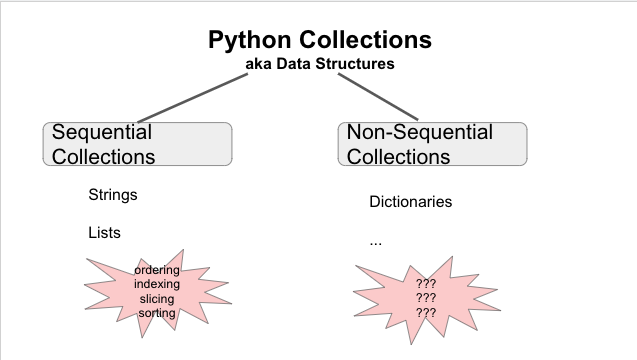

Today you will learn how store data in Dictionaries. 

#### Dictionary <br>
A dictionary is like a list, but more general. In a list, the indices have to be integers; but a dictionary they can be any **immutable** type. 

You can think of a dictionary as a mapping between a set of indices (which are called keys) and a set of values. Each key maps to a value. The association of a key and a value is called a key-value pair or sometimes an item. 

(from Think Python, Chapter 11)



## Dictionary creation

In [8]:
# a dictionary that stores prices of bakery items
# create a dictionary of key-value pairs
# notice the curly brackets
# notice it can span over more than one line, indenting doesn't matter
price_dict = { 
        'broccoli': 4.99,
             'orange': 1.19,
'pie': 3.95, 
         'donut': 1.25,    'muffin': 2.25,
         'cookie': 0.79,  'milk':1.65, 'bread': 5.99}  
price_dict

{'broccoli': 4.99,
 'orange': 1.19,
 'pie': 3.95,
 'donut': 1.25,
 'muffin': 2.25,
 'cookie': 0.79,
 'milk': 1.65,
 'bread': 5.99}

## Dictionary length and lookups

In [9]:
# print the length of the dictionary
print(len(price_dict))

# print the price for a certain item
print(price_dict['bread'])

# print the price for donut
print(price_dict['donut'])

# try looking up a non-existent key
# print(price_dict['kiwi']) # doesn't work due to KeyError

8
5.99
1.25


## Dictionaries are mutable (just like lists)

In [10]:
# Dictionaries are mutable
# add a new key - value pair
price_dict['drink'] = 2.49

# add one of your own
price_dict['apple'] = 0.49

price_dict

{'broccoli': 4.99,
 'orange': 1.19,
 'pie': 3.95,
 'donut': 1.25,
 'muffin': 2.25,
 'cookie': 0.79,
 'milk': 1.65,
 'bread': 5.99,
 'drink': 2.49,
 'apple': 0.49}

In [11]:
# dictionaries are mutable
# change the value associated with a key....syntax is like add

price_dict['drink'] = 2.99
  
price_dict

{'broccoli': 4.99,
 'orange': 1.19,
 'pie': 3.95,
 'donut': 1.25,
 'muffin': 2.25,
 'cookie': 0.79,
 'milk': 1.65,
 'bread': 5.99,
 'drink': 2.99,
 'apple': 0.49}

## Deleting key-value pair

In [12]:
# delete a key/value pair
price_dict.pop('bread')  # or del(price_dict['hot dog'])

# delete another key/value pair

del(price_dict['drink'])

# try deleting someting that is not there

# price_dict.pop('apples') # doesn't work due to KeyError

# fix the above with a conditional: come back to this after learning about in operator

price_dict

{'broccoli': 4.99,
 'orange': 1.19,
 'pie': 3.95,
 'donut': 1.25,
 'muffin': 2.25,
 'cookie': 0.79,
 'milk': 1.65,
 'apple': 0.49}

## in operator

In [13]:
# use 'in' to see if a key exists
print('donut' in price_dict)  # default is to check the keys
print(1.25 in price_dict)     # default is NOT values

True
False


## Example: Print Major Count
- Let's go back to CS220 survey data

In [14]:
# Initialize an empty dictionary
major_freq = {}

# Iterate over csv rows to find major count
for row in rows:
    major = row[2]
    if major not in major_freq:
        major_freq[major] = 0
    else:
        major_freq[major] += 1

major_freq

{'Computer Science': 150,
 'Engineering': 327,
 'Business': 92,
 'Data Science': 177,
 'not sure yet but maybe biology ': 0,
 'Psychology/ Pre-law ': 0,
 'Social Science': 23,
 'Natural Science': 51,
 'Economics': 4,
 'Economics w/ Math Emphasis': 0,
 'Accounting': 0,
 'Psychology': 0,
 'atmospheric and oceanic science': 0,
 'Biomedical Engineering': 1,
 'undecided': 3,
 'Neurobio and Econ': 0,
 'Statistics': 5,
 'biology': 0,
 'mathematics': 0,
 'AMEP': 1,
 'Undecided': 2,
 'Mathematics': 3,
 'math': 1,
 'communication arts': 0,
 'Geographic Information Systems': 0,
 'Math': 2,
 'Environmental Sciences ': 0,
 'Economics with math emphasis': 0,
 'statistics': 1,
 'Public Policy': 0,
 'Information Systems': 1,
 'Marketing and Information Systems': 0,
 'STATS': 0,
 'Mechanical Engineering': 0,
 'Human Development and Communications': 0,
 'Meteorology or Oceanography': 0,
 'economics': 1,
 'Economics with a data science certificate ': 0,
 'Geography/GIS': 0,
 'Agricultural and Applied Eco

### Find the major with the highest frequency

In [15]:
# You need to iterate over major_freq dictionary to determine the highest count

most_common_major = None  
max_count = None

for major in major_freq:
    count = major_freq[major]
    if max_count == None or count > max_count:
        max_count = count
        most_common_major = major

print("The major \"{}\" appeared {} times".format(str(most_common_major), max_count))

The major "Engineering" appeared 327 times
